<a href="https://colab.research.google.com/github/srijan-das/mlaicrc/blob/master/PycharmProjects/Udemy/keras_redgession_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [358]:
df = pd.read_csv('/content/kc_house_data.csv')
print(df.head(),'\n',df.info(),'\n',df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB
           id      

In [359]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [360]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


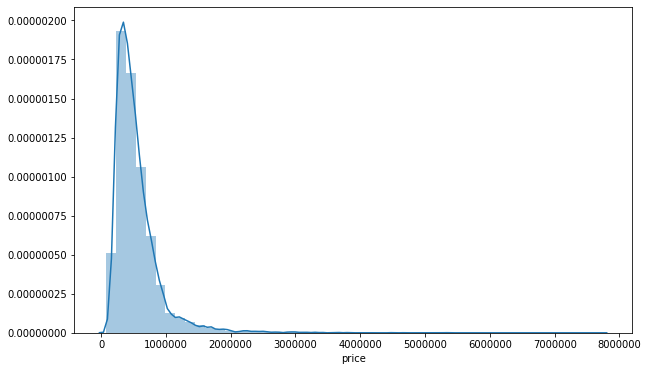

In [361]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'])

In [0]:
#plt.figure(figsize=(10,6))
#sns.pairplot(df)

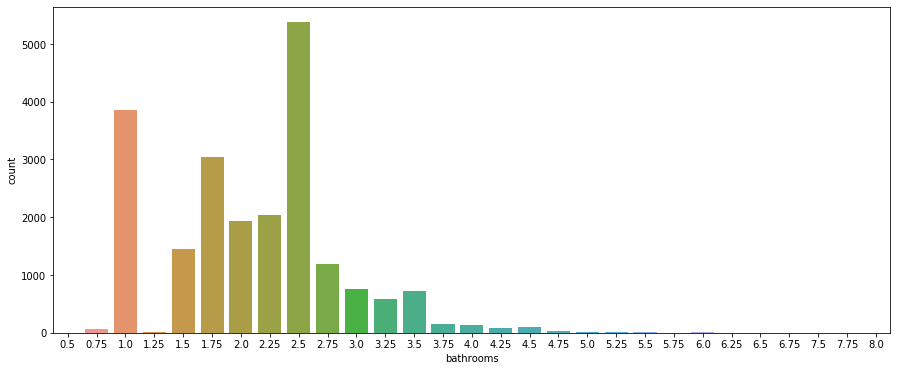

In [363]:
plt.figure(figsize=(15,6))
sns.countplot(df['bathrooms'])

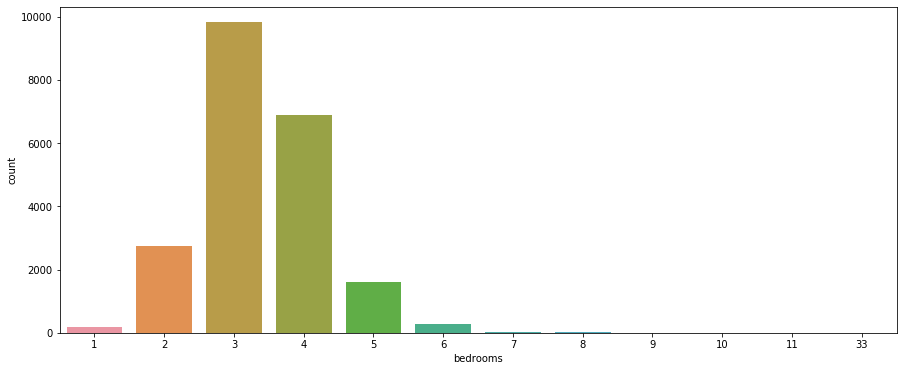

In [364]:
plt.figure(figsize=(15,6))
sns.countplot(df['bedrooms'])

In [365]:
# important data exploration
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

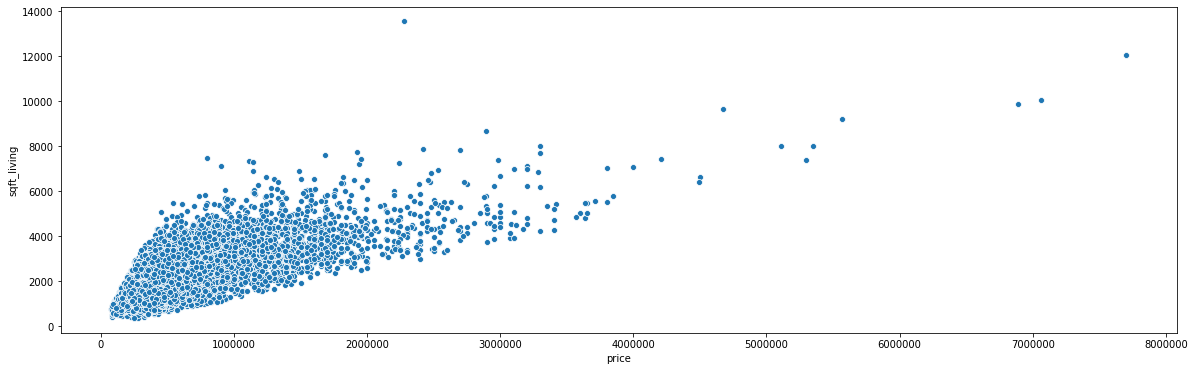

In [366]:
plt.figure(figsize=(20,6))
sns.scatterplot(df['price'], df['sqft_living'])

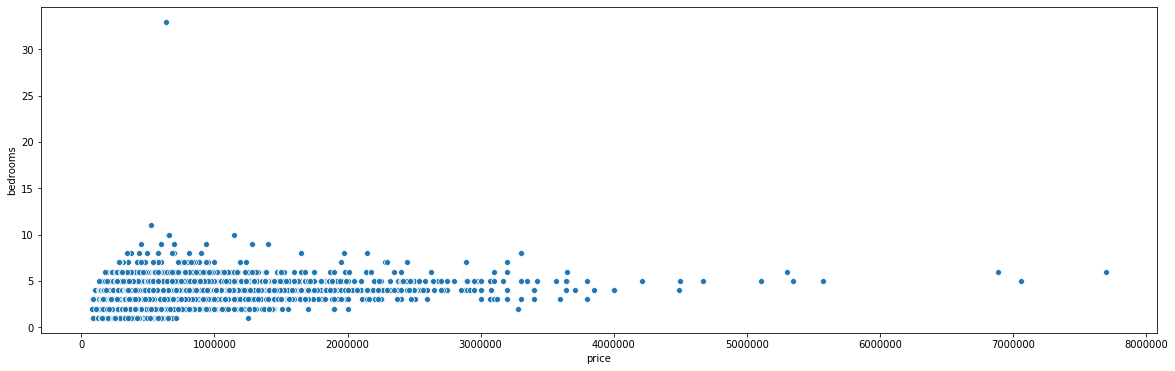

In [367]:
plt.figure(figsize=(20,6))
sns.scatterplot(df['price'], df['bedrooms'])

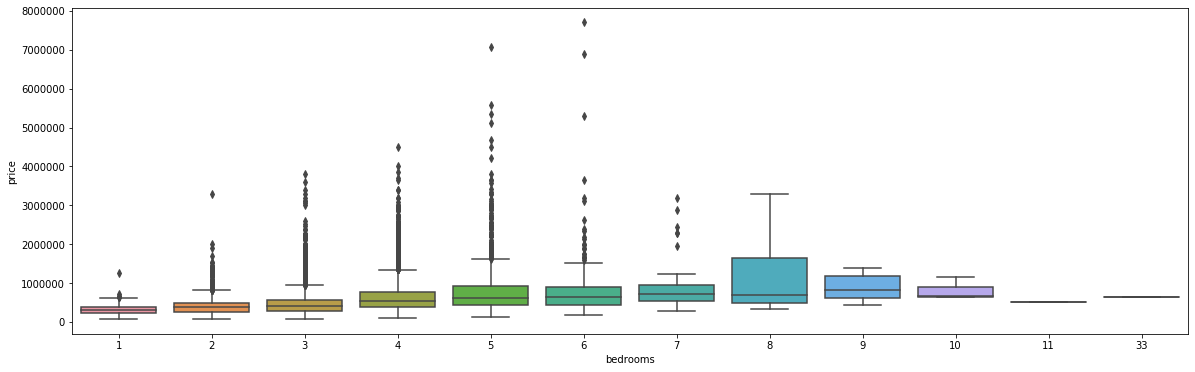

In [368]:
plt.figure(figsize=(20,6))
sns.boxplot(data = df, x='bedrooms', y='price')

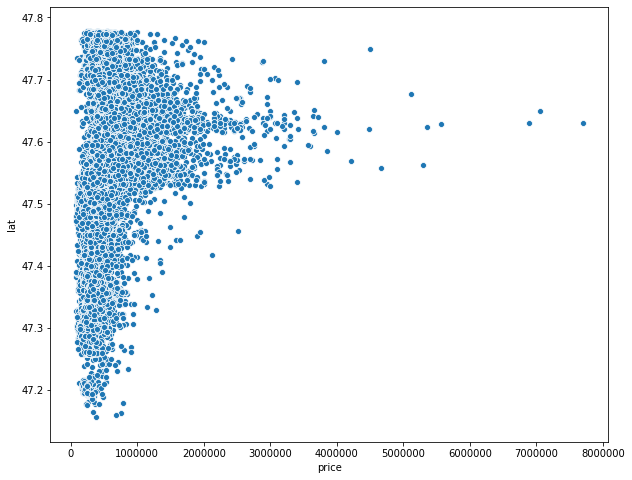

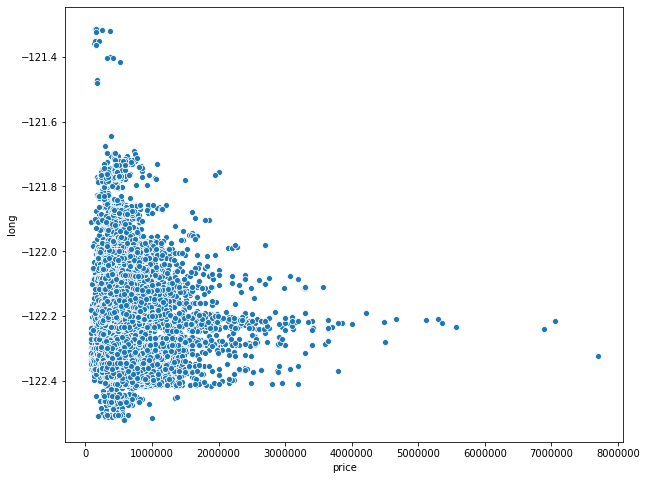

In [369]:
# this is not geographical plot. this is only to visualize correlation between location and price
plt.figure(figsize=(10,8))
sns.scatterplot(data = df, x = 'price', y='lat')
plt.show()
plt.figure(figsize=(10,8))
sns.scatterplot(data = df, x = 'price', y='long')
plt.show()

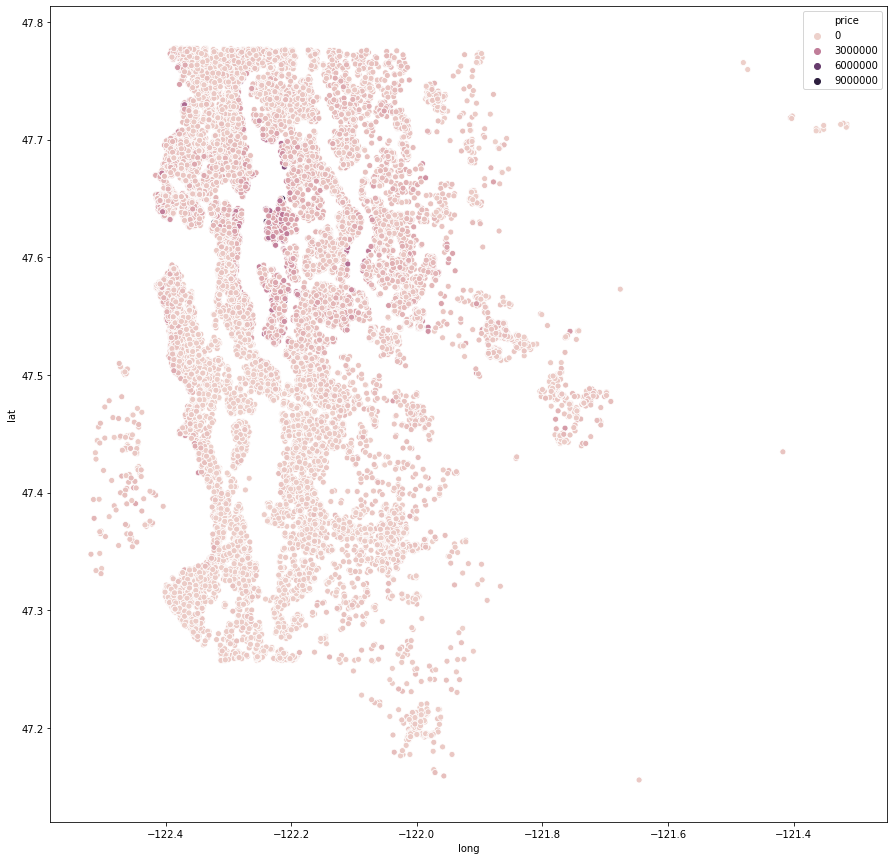

In [370]:
plt.figure(figsize=(15,15))
sns.scatterplot(data = df, x ='long', y='lat', hue='price')
#I cant believe this works :)))

In [371]:
#to get better color gradient, we need to drop outliers i.e really expensive houses
#per above histograms, $ 3 Million is a good point to begin removing outliers from

len(df)*0.005

107.985

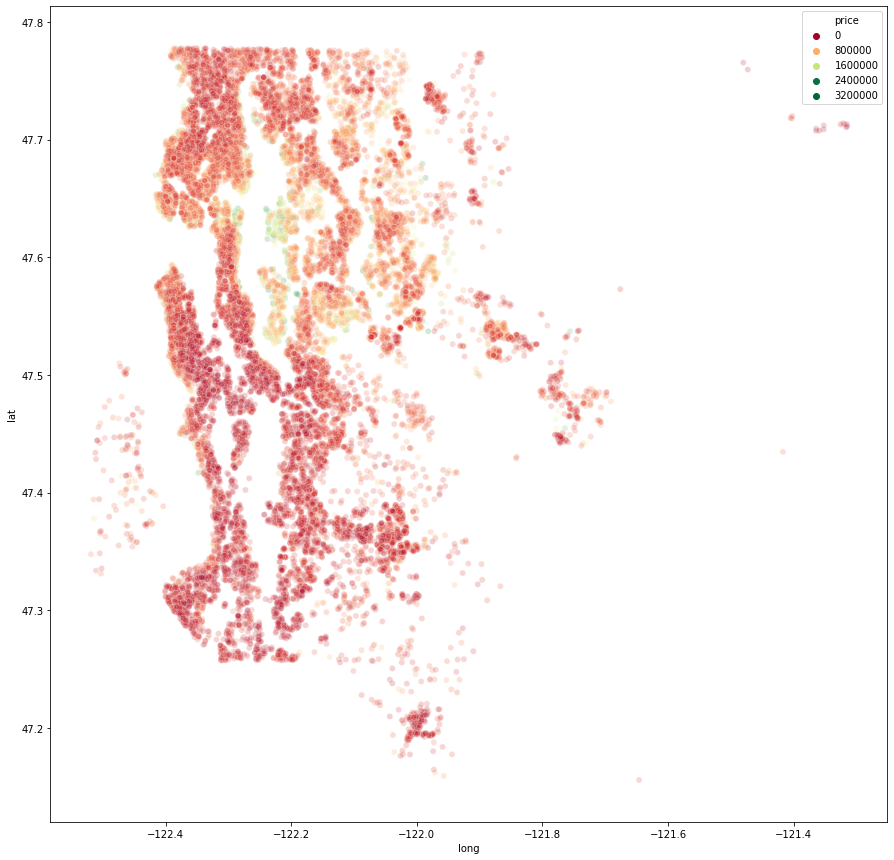

In [372]:
non_top_1_percent = df.sort_values('price', ascending=False).iloc[108:]
plt.figure(figsize=(15,15))
sns.scatterplot(data = non_top_1_percent, x ='long', y='lat', hue='price', palette='RdYlGn', alpha = 0.2)

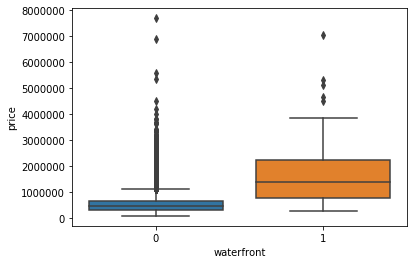

In [373]:
sns.boxplot(x='waterfront', y='price', data=df)

In [0]:
#for a better fitting model
df = df[(df['price']) < 3500000]

In [375]:
print(df.head())

           id        date     price  ...     long  sqft_living15  sqft_lot15
0  7129300520  10/13/2014  221900.0  ... -122.257           1340        5650
1  6414100192   12/9/2014  538000.0  ... -122.319           1690        7639
2  5631500400   2/25/2015  180000.0  ... -122.233           2720        8062
3  2487200875   12/9/2014  604000.0  ... -122.393           1360        5000
4  1954400510   2/18/2015  510000.0  ... -122.045           1800        7503

[5 rows x 21 columns]


In [0]:
#feature enfineering

In [0]:
df= df.drop('id', axis=1)

In [0]:
df['date'] = pd.to_datetime(df['date'])

In [0]:
df['year'] = df['date'].apply(lambda date:date.year)
df['month'] = df['date'].apply(lambda date:date.month)

In [380]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


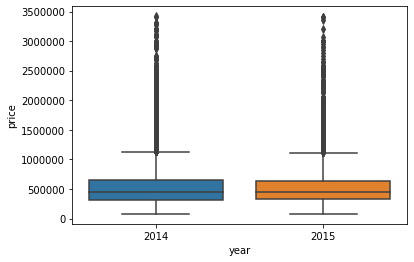

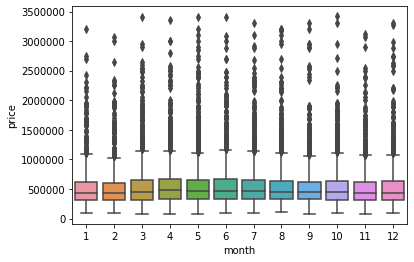

In [381]:
sns.boxplot(x='year', y='price', data = df)
plt.show()
sns.boxplot(x='month', y='price', data = df)
plt.show()

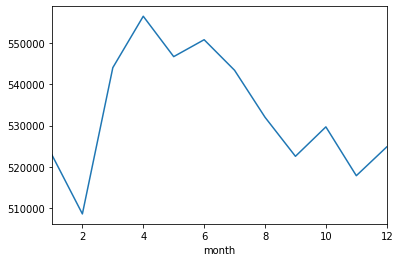

In [382]:
df.groupby('month').mean()['price'].plot()

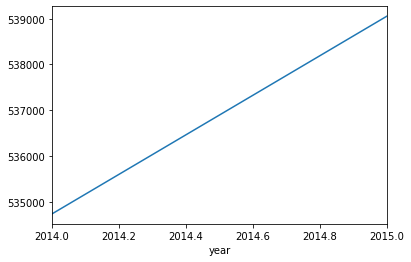

In [383]:
df.groupby('year').mean()['price'].plot()

In [0]:
df = df.drop('date', axis =1)

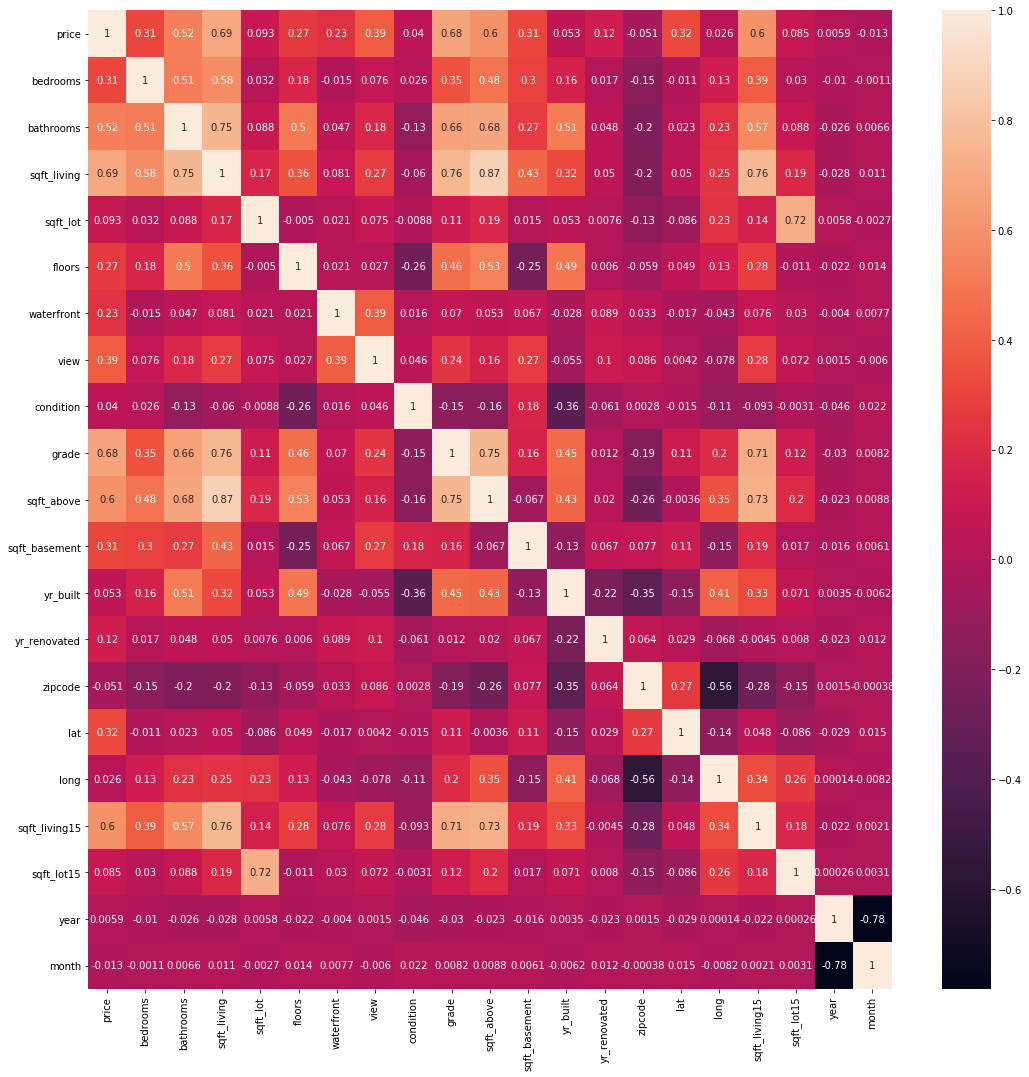

In [385]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), annot=True)

In [386]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
price,1.000000,0.312682,0.519826,0.694041,0.093282,0.266488,0.232987,0.391838,0.040053,0.678894,0.598253,0.311305,0.053179,0.124836,-0.050915,0.324231,0.025767,0.599161,0.085187,0.005913,-0.013411
bedrooms,0.312682,1.000000,0.512951,0.579928,0.032105,0.177169,-0.015450,0.075720,0.026441,0.353841,0.478320,0.300299,0.155371,0.017409,-0.153381,-0.010669,0.132431,0.391288,0.030291,-0.010164,-0.001059
bathrooms,0.519826,0.512951,1.000000,0.751460,0.088104,0.504491,0.047277,0.178873,-0.127355,0.661554,0.681460,0.274264,0.510376,0.047708,-0.204768,0.022653,0.227665,0.566622,0.087848,-0.026338,0.006631
sqft_living,0.694041,0.579928,0.751460,1.000000,0.174948,0.356087,0.080898,0.274200,-0.059883,0.760585,0.874115,0.425947,0.321924,0.050347,-0.200330,0.050402,0.246544,0.757598,0.185906,-0.028451,0.010978
sqft_lot,0.093282,0.032105,0.088104,0.174948,1.000000,-0.005016,0.021069,0.074618,-0.008816,0.114491,0.185020,0.014735,0.052850,0.007591,-0.129564,-0.085713,0.230323,0.144641,0.718199,0.005766,-0.002697
floors,0.266488,0.177169,0.504491,0.356087,-0.005016,1.000000,0.020949,0.026705,-0.264149,0.459374,0.526653,-0.249536,0.489320,0.005960,-0.059286,0.048851,0.126173,0.279335,-0.010998,-0.022298,0.013984
waterfront,0.232987,-0.015450,0.047277,0.080898,0.021069,0.020949,1.000000,0.392308,0.016377,0.069652,0.053150,0.067173,-0.028107,0.088987,0.032983,-0.017351,-0.042779,0.075936,0.030211,-0.004041,0.007673
view,0.391838,0.075720,0.178873,0.274200,0.074618,0.026705,0.392308,1.000000,0.046038,0.244218,0.156490,0.271757,-0.055170,0.101965,0.086081,0.004213,-0.078046,0.275163,0.072240,0.001470,-0.006039
condition,0.040053,0.026441,-0.127355,-0.059883,-0.008816,-0.264149,0.016377,0.046038,1.000000,-0.147651,-0.160194,0.175384,-0.361501,-0.060727,0.002757,-0.015058,-0.105877,-0.093423,-0.003062,-0.046070,0.022499
grade,0.678894,0.353841,0.661554,0.760585,0.114491,0.459374,0.069652,0.244218,-0.147651,1.000000,0.753190,0.159396,0.449203,0.012118,-0.185269,0.112529,0.202402,0.711747,0.120603,-0.030280,0.008202


In [0]:
df = df.drop('zipcode', axis=1)

In [388]:
df['yr_renovated'].value_counts()

0       20665
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

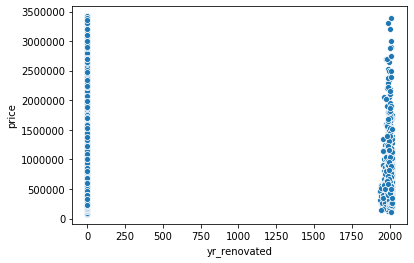

In [389]:
sns.scatterplot(x='yr_renovated', y='price', data=df)

In [0]:
#df = df.drop('yr_renovated', axis=1)

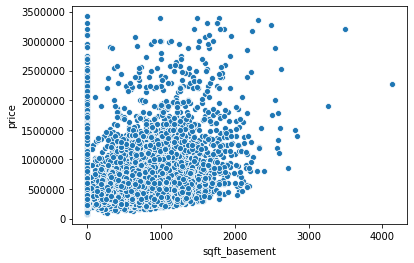

In [391]:
sns.scatterplot(x='sqft_basement', y='price', data=df)

In [0]:
# making the model

In [0]:
X = df.drop(['price','year','condition','long'], axis = 1).values
y = df['price'].values

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [399]:
X_train.shape

(15102, 16)

In [0]:
model = Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [401]:
#validation data is used only to check for overfitting. the weights and biases are not changes fit test data
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=64, epochs=500)

Train on 15102 samples, validate on 6473 samples
Epoch 1/500
15102/15102 [==============================] - 1s 78us/sample - loss: 403976338820.2548 - val_loss: 401080589317.2205
Epoch 2/500
15102/15102 [==============================] - 1s 42us/sample - loss: 366505450781.1903 - val_loss: 283444819041.9230
Epoch 3/500
15102/15102 [==============================] - 1s 43us/sample - loss: 153343744800.3772 - val_loss: 80861362628.1230
Epoch 4/500
15102/15102 [==============================] - 1s 40us/sample - loss: 78011227684.2760 - val_loss: 76839618655.2337
Epoch 5/500
15102/15102 [==============================] - 1s 43us/sample - loss: 75001162409.0393 - val_loss: 73644335168.5438
Epoch 6/500
15102/15102 [==============================] - 1s 41us/sample - loss: 71721308792.4905 - val_loss: 70263929779.5915
Epoch 7/500
15102/15102 [==============================] - 1s 39us/sample - loss: 68268750499.4793 - val_loss: 66714379894.7258
Epoch 8/500
15102/15102 [=========================

In [402]:
loss_df = pd.DataFrame(model.history.history)
print(loss_df.head())

           loss      val_loss
0  4.039763e+11  4.010806e+11
1  3.665055e+11  2.834448e+11
2  1.533437e+11  8.086136e+10
3  7.801123e+10  7.683962e+10
4  7.500116e+10  7.364434e+10


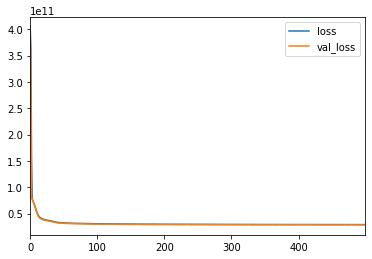

In [403]:
loss_df.plot()
#till value loss and training loss are same training can continue, till value loss starts to increase

In [0]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [0]:
predictions = model.predict(X_test)

In [406]:
np.sqrt(mean_squared_error(y_test, predictions))

169308.72923447107

In [407]:
mean_absolute_error(y_test, predictions)

107185.6470555577

In [408]:
df['price'].describe()

count    2.157500e+04
mean     5.361309e+05
std      3.414338e+05
min      7.800000e+04
25%      3.219750e+05
50%      4.500000e+05
75%      6.434515e+05
max      3.420000e+06
Name: price, dtype: float64

In [409]:
5.402966e+05

540296.6

In [410]:
155094.90187053397 / 540296.6

0.28705511356268754

In [411]:
explained_variance_score(y_test, predictions)

0.7554411702554911

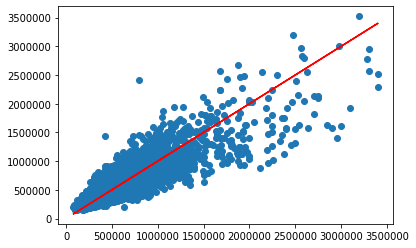

In [412]:
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r')

In [0]:
# predicting on new data sort of

In [0]:
single_house = df.drop(['price','year','condition','long'], axis = 1).iloc[1]

In [0]:
model.save('kc_house_price_regressor.h5')

In [0]:
single_house = scaler.transform(single_house.values.reshape(-1,16))

In [433]:
pred_new_single = model.predict(single_house)
print(pred_new_single[0][0], '<----- Predicted Actual---->', y_test[0])

646598.94 <----- Predicted Actual----> 1540000.0


In [427]:
print(pred_new_single[0][0], '<----- Predicted Actual---->', y_test[0])

287287.1 <----- Predicted Actual----> 1540000.0
